# Exploring Activation Functions in Neural Networks



## Section 1: Setup and Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


## Section 2: Activation Functions Implementation

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns.

In [2]:
# Step Function: Output is 0 or 1
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Binary Sigmoid: Output range [0, 1]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Bipolar Sigmoid: Output range [-1, 1]
def bipolar_sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

# Tanh: Output range [-1, 1]
def tanh(x):
    return np.tanh(x)

# ReLU: Output range [0, ∞)
def relu(x):
    return np.maximum(0, x)

print("All activation functions defined!")

All activation functions defined!


### Derivatives for Backpropagation

In [3]:
# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Derivative of tanh
def tanh_derivative(x):
    return 1 - np.power(x, 2)

# Derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

print("Derivative functions defined!")

Derivative functions defined!


## Section 3: Visualize Activation Functions

Let's visualize how each activation function transforms input values.

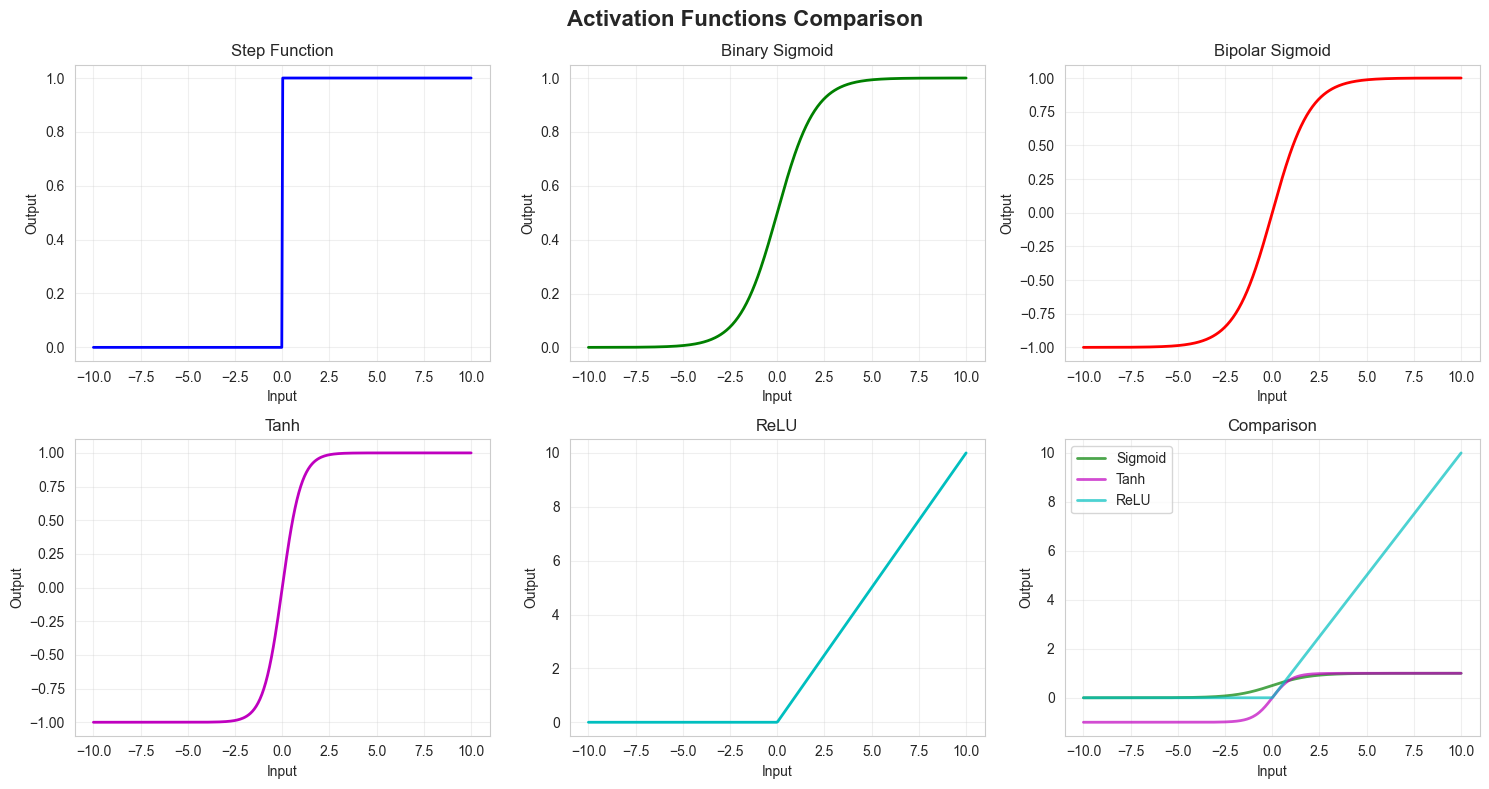


Key Characteristics:
- Step: Binary output, not differentiable
- Sigmoid: Smooth, outputs [0,1], vanishing gradient issue
- Bipolar Sigmoid: Outputs [-1,1], centered at zero
- Tanh: Outputs [-1,1], zero-centered, better than sigmoid
- ReLU: Fast, no vanishing gradient, but 'dying ReLU' problem


In [4]:
# Generate input values
x = np.linspace(-10, 10, 400)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Activation Functions Comparison', fontsize=16, fontweight='bold')

# Step Function
axes[0, 0].plot(x, step_function(x), 'b-', linewidth=2)
axes[0, 0].set_title('Step Function')
axes[0, 0].set_xlabel('Input')
axes[0, 0].set_ylabel('Output')
axes[0, 0].grid(True, alpha=0.3)

# Binary Sigmoid
axes[0, 1].plot(x, sigmoid(x), 'g-', linewidth=2)
axes[0, 1].set_title('Binary Sigmoid')
axes[0, 1].set_xlabel('Input')
axes[0, 1].set_ylabel('Output')
axes[0, 1].grid(True, alpha=0.3)

# Bipolar Sigmoid
axes[0, 2].plot(x, bipolar_sigmoid(x), 'r-', linewidth=2)
axes[0, 2].set_title('Bipolar Sigmoid')
axes[0, 2].set_xlabel('Input')
axes[0, 2].set_ylabel('Output')
axes[0, 2].grid(True, alpha=0.3)

# Tanh
axes[1, 0].plot(x, tanh(x), 'm-', linewidth=2)
axes[1, 0].set_title('Tanh')
axes[1, 0].set_xlabel('Input')
axes[1, 0].set_ylabel('Output')
axes[1, 0].grid(True, alpha=0.3)

# ReLU
axes[1, 1].plot(x, relu(x), 'c-', linewidth=2)
axes[1, 1].set_title('ReLU')
axes[1, 1].set_xlabel('Input')
axes[1, 1].set_ylabel('Output')
axes[1, 1].grid(True, alpha=0.3)

# Comparison
axes[1, 2].plot(x, sigmoid(x), 'g-', linewidth=2, label='Sigmoid', alpha=0.7)
axes[1, 2].plot(x, tanh(x), 'm-', linewidth=2, label='Tanh', alpha=0.7)
axes[1, 2].plot(x, relu(x), 'c-', linewidth=2, label='ReLU', alpha=0.7)
axes[1, 2].set_title('Comparison')
axes[1, 2].set_xlabel('Input')
axes[1, 2].set_ylabel('Output')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Characteristics:")
print("- Step: Binary output, not differentiable")
print("- Sigmoid: Smooth, outputs [0,1], vanishing gradient issue")
print("- Bipolar Sigmoid: Outputs [-1,1], centered at zero")
print("- Tanh: Outputs [-1,1], zero-centered, better than sigmoid")
print("- ReLU: Fast, no vanishing gradient, but 'dying ReLU' problem")

## Section 4: XOR Dataset

XOR is a classic non-linearly separable problem, perfect for testing neural networks.

XOR Dataset:

Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Expected Outputs:
[0 1 1 0]


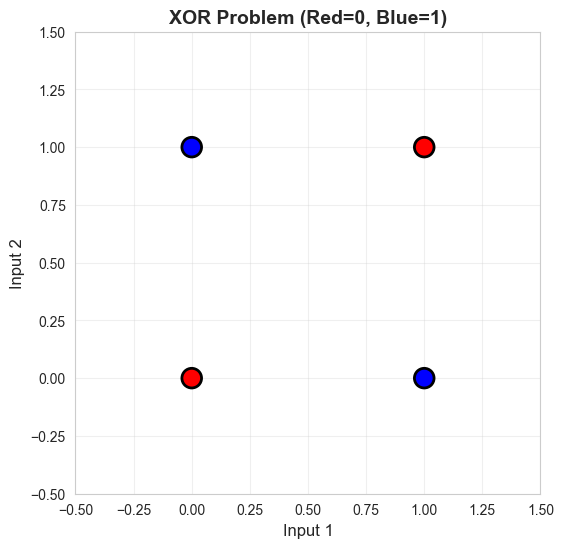


Note: XOR is not linearly separable - requires hidden layers!


In [ ]:
# XOR dataset
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

print("XOR Dataset:")
print("\nInputs:")
print(X)
print("\nExpected Outputs:")
print(y.flatten())

# Visualize XOR problem
plt.figure(figsize=(6, 6))
colors = ['red' if label == 0 else 'blue' for label in y.flatten()]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=200, edgecolors='black', linewidth=2)
plt.xlabel('Input 1', fontsize=12)
plt.ylabel('Input 2', fontsize=12)
plt.title('XOR Problem (Red=0, Blue=1)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

print("\nNote: XOR is not linearly separable - requires hidden layers!")

## Section 5: Simple Neural Network Class

A neural network with:
- Input layer (2 neurons)
- Hidden layer (4 neurons)
- Output layer (1 neuron)

In [6]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        # Initialize weights randomly
        np.random.seed(42)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        
        # Set activation function
        self.activation_name = activation
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        
        self.loss_history = []
    
    def forward(self, X):
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        
        # Output layer (always sigmoid for binary classification)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, learning_rate):
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.activation_derivative(self.a1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Update weights
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss (Binary Cross Entropy)
            loss = -np.mean(y * np.log(output + 1e-8) + (1 - y) * np.log(1 - output + 1e-8))
            self.loss_history.append(loss)
            
            # Backward pass
            self.backward(X, y, learning_rate)
            
            # Print progress every 1000 epochs
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")
    
    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)

print("Neural Network class defined successfully!")

Neural Network class defined successfully!


## Section 6: Train with Sigmoid Activation

In [7]:
print("Training Neural Network with SIGMOID activation...\n")

nn_sigmoid = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, activation='sigmoid')
nn_sigmoid.train(X, y, epochs=5000, learning_rate=0.5)

predictions = nn_sigmoid.predict(X)
accuracy = accuracy_score(y, predictions)

print(f"\nFinal Accuracy: {accuracy*100:.2f}%")
print("\nPredictions vs Actual:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted: {predictions[i][0]}, Actual: {y[i][0]}")

Training Neural Network with SIGMOID activation...

Epoch 1000/5000, Loss: 0.5946
Epoch 2000/5000, Loss: 0.0284
Epoch 3000/5000, Loss: 0.0103
Epoch 4000/5000, Loss: 0.0061
Epoch 5000/5000, Loss: 0.0043

Final Accuracy: 100.00%

Predictions vs Actual:
Input: [0 0] -> Predicted: 0, Actual: 0
Input: [0 1] -> Predicted: 1, Actual: 1
Input: [1 0] -> Predicted: 1, Actual: 1
Input: [1 1] -> Predicted: 0, Actual: 0


## Section 7: Train with Tanh Activation

In [8]:
print("Training Neural Network with TANH activation...\n")

nn_tanh = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, activation='tanh')
nn_tanh.train(X, y, epochs=5000, learning_rate=0.5)

predictions = nn_tanh.predict(X)
accuracy = accuracy_score(y, predictions)

print(f"\nFinal Accuracy: {accuracy*100:.2f}%")
print("\nPredictions vs Actual:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted: {predictions[i][0]}, Actual: {y[i][0]}")

Training Neural Network with TANH activation...

Epoch 1000/5000, Loss: 0.0063
Epoch 2000/5000, Loss: 0.0027
Epoch 3000/5000, Loss: 0.0017
Epoch 4000/5000, Loss: 0.0013
Epoch 5000/5000, Loss: 0.0010

Final Accuracy: 100.00%

Predictions vs Actual:
Input: [0 0] -> Predicted: 0, Actual: 0
Input: [0 1] -> Predicted: 1, Actual: 1
Input: [1 0] -> Predicted: 1, Actual: 1
Input: [1 1] -> Predicted: 0, Actual: 0


## Section 8: Train with ReLU Activation

In [9]:
print("Training Neural Network with RELU activation...\n")

nn_relu = SimpleNeuralNetwork(input_size=2, hidden_size=4, output_size=1, activation='relu')
nn_relu.train(X, y, epochs=5000, learning_rate=0.1)

predictions = nn_relu.predict(X)
accuracy = accuracy_score(y, predictions)

print(f"\nFinal Accuracy: {accuracy*100:.2f}%")
print("\nPredictions vs Actual:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted: {predictions[i][0]}, Actual: {y[i][0]}")

Training Neural Network with RELU activation...

Epoch 1000/5000, Loss: 0.4808
Epoch 2000/5000, Loss: 0.4785
Epoch 3000/5000, Loss: 0.4780
Epoch 4000/5000, Loss: 0.4778
Epoch 5000/5000, Loss: 0.4777

Final Accuracy: 75.00%

Predictions vs Actual:
Input: [0 0] -> Predicted: 1, Actual: 0
Input: [0 1] -> Predicted: 1, Actual: 1
Input: [1 0] -> Predicted: 1, Actual: 1
Input: [1 1] -> Predicted: 0, Actual: 0


## Section 9: Compare Performance

Visualize the learning curves to understand convergence behavior.

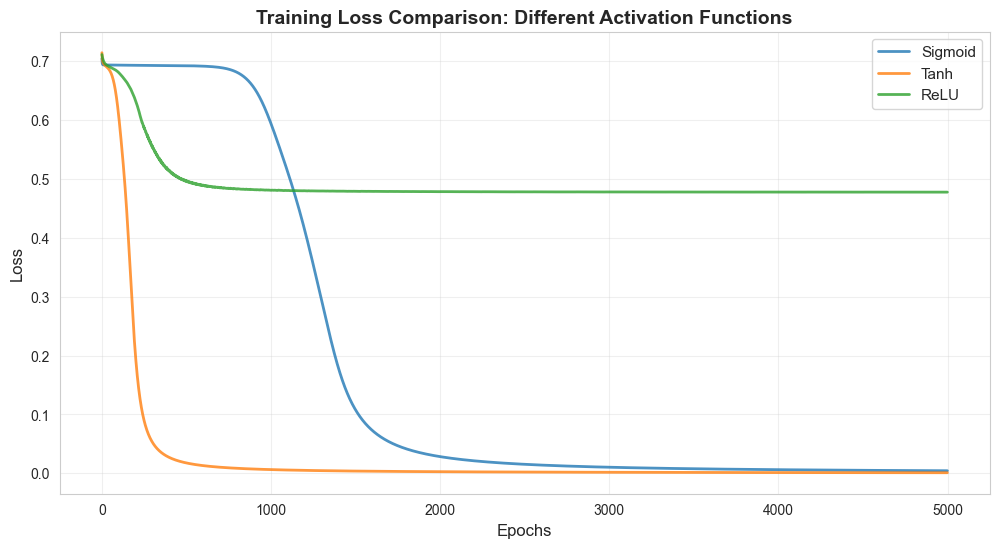

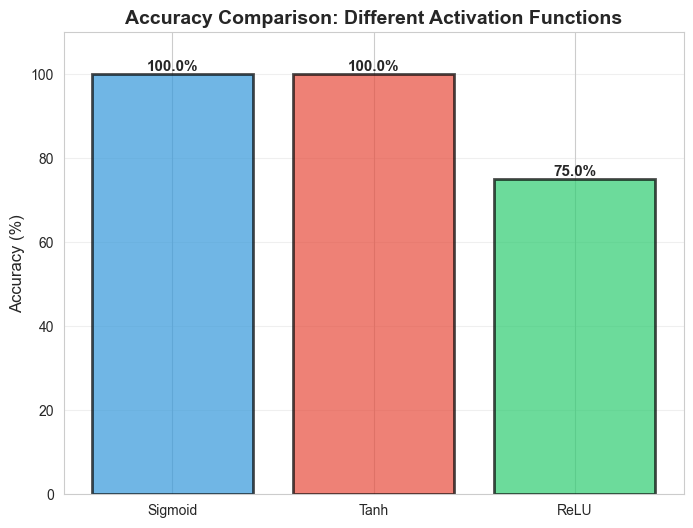


PERFORMANCE SUMMARY
Sigmoid Accuracy: 100.00%
Tanh Accuracy:    100.00%
ReLU Accuracy:    75.00%


In [10]:
# Plot loss curves
plt.figure(figsize=(12, 6))

plt.plot(nn_sigmoid.loss_history, label='Sigmoid', linewidth=2, alpha=0.8)
plt.plot(nn_tanh.loss_history, label='Tanh', linewidth=2, alpha=0.8)
plt.plot(nn_relu.loss_history, label='ReLU', linewidth=2, alpha=0.8)

plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Comparison: Different Activation Functions', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Calculate accuracies
accuracy_sigmoid = accuracy_score(y, nn_sigmoid.predict(X))
accuracy_tanh = accuracy_score(y, nn_tanh.predict(X))
accuracy_relu = accuracy_score(y, nn_relu.predict(X))

# Bar plot for accuracy comparison
plt.figure(figsize=(8, 6))
activations = ['Sigmoid', 'Tanh', 'ReLU']
accuracies = [accuracy_sigmoid * 100, accuracy_tanh * 100, accuracy_relu * 100]
colors = ['#3498db', '#e74c3c', '#2ecc71']

bars = plt.bar(activations, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy Comparison: Different Activation Functions', fontsize=14, fontweight='bold')
plt.ylim([0, 110])
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

print("\n" + "="*60)
print("PERFORMANCE SUMMARY")
print("="*60)
print(f"Sigmoid Accuracy: {accuracy_sigmoid*100:.2f}%")
print(f"Tanh Accuracy:    {accuracy_tanh*100:.2f}%")
print(f"ReLU Accuracy:    {accuracy_relu*100:.2f}%")
print("="*60)

## Section 10: Key Insights

**Observations:**

1. **Sigmoid:**
   - Smooth gradients
   - Output range [0,1] good for probabilities
   - Can suffer from vanishing gradients

2. **Tanh:**
   - Zero-centered output [-1,1]
   - Often converges faster than sigmoid
   - Still has vanishing gradient issue

3. **ReLU:**
   - Computationally efficient
   - No vanishing gradient for positive values
   - Can have 'dying ReLU' problem
   - Usually requires lower learning rate

**Best Practice:** For hidden layers, ReLU is often preferred in modern networks. For output layer in binary classification, use sigmoid.